In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
Data = pd.read_csv("C:\\Users\\Nimisha Jain\\Downloads\\train.csv")

In [72]:
Data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [73]:
Data.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [74]:
Data.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

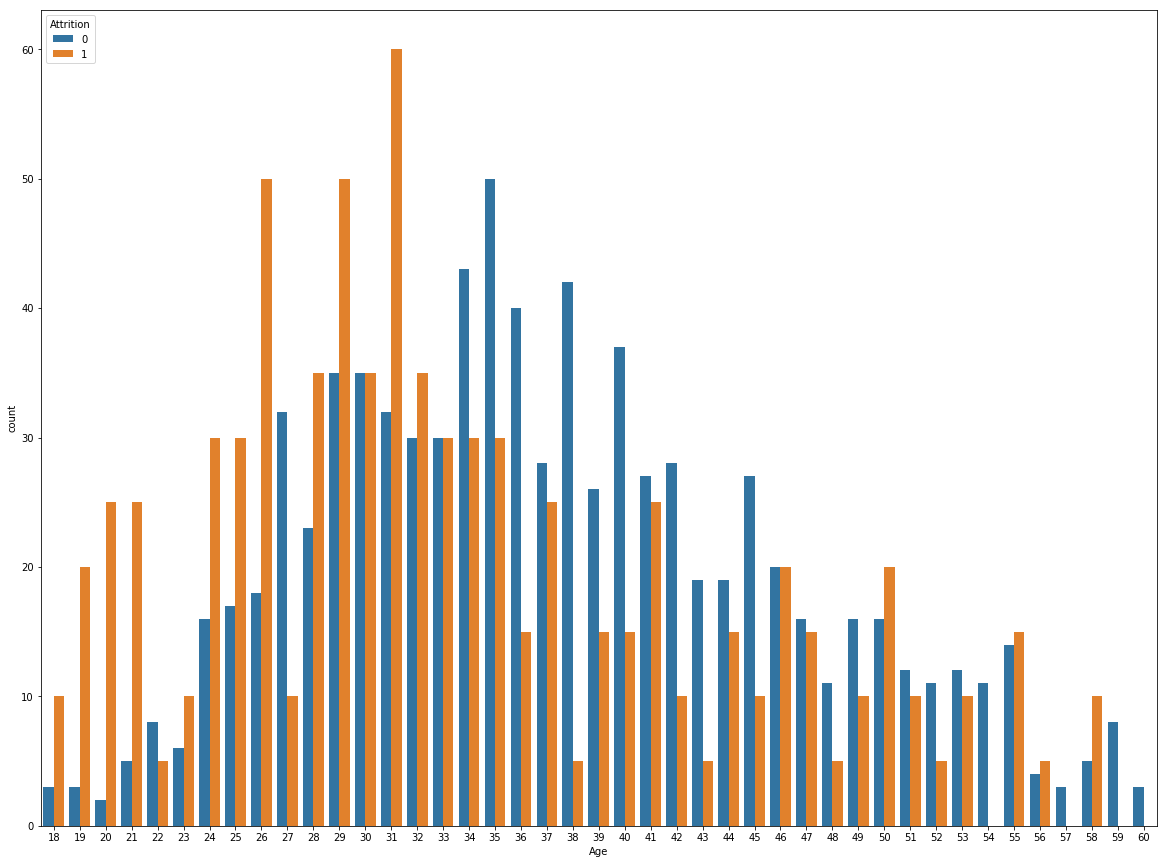

In [75]:
size = (20,15)
fig, x = plt.subplots(figsize = size)
sns.countplot(data=Data, x="Age",hue="Attrition")

In [76]:
l_a=[]
l_i=[]
for obj in Data:
    if Data[obj].dtype == 'O':
        l_a.append(obj)
    elif Data[obj].dtype == 'int64':
        l_i.append(obj)

In [77]:
Data_int = Data[l_i]
Data_alpha = Data[l_a]

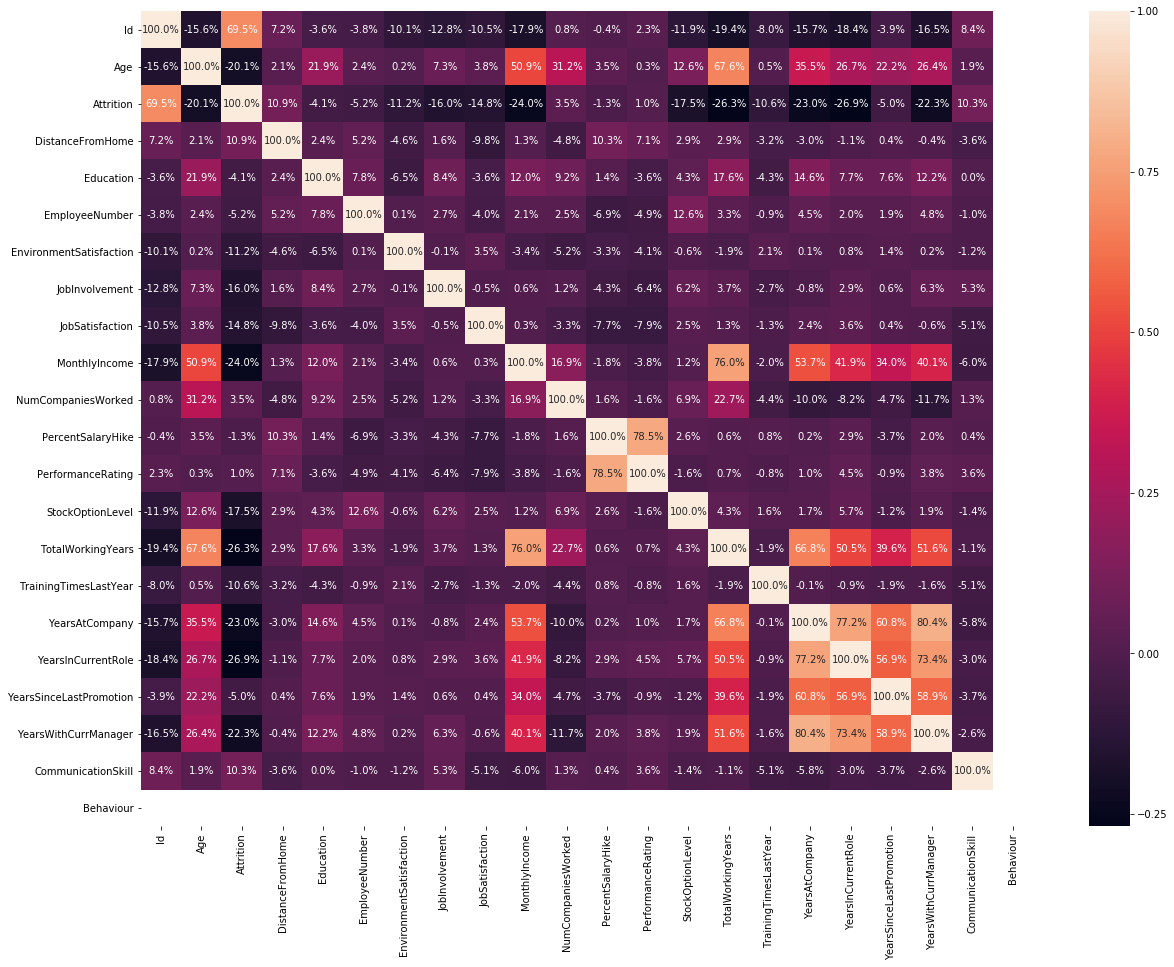

In [78]:
plt.figure(figsize=(20,15))
sns.heatmap(Data_int.corr(),annot=True,fmt=".1%")

C:\Users\Nimisha Jain\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nimisha Jain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nimisha Jain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Nimisha Jain\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


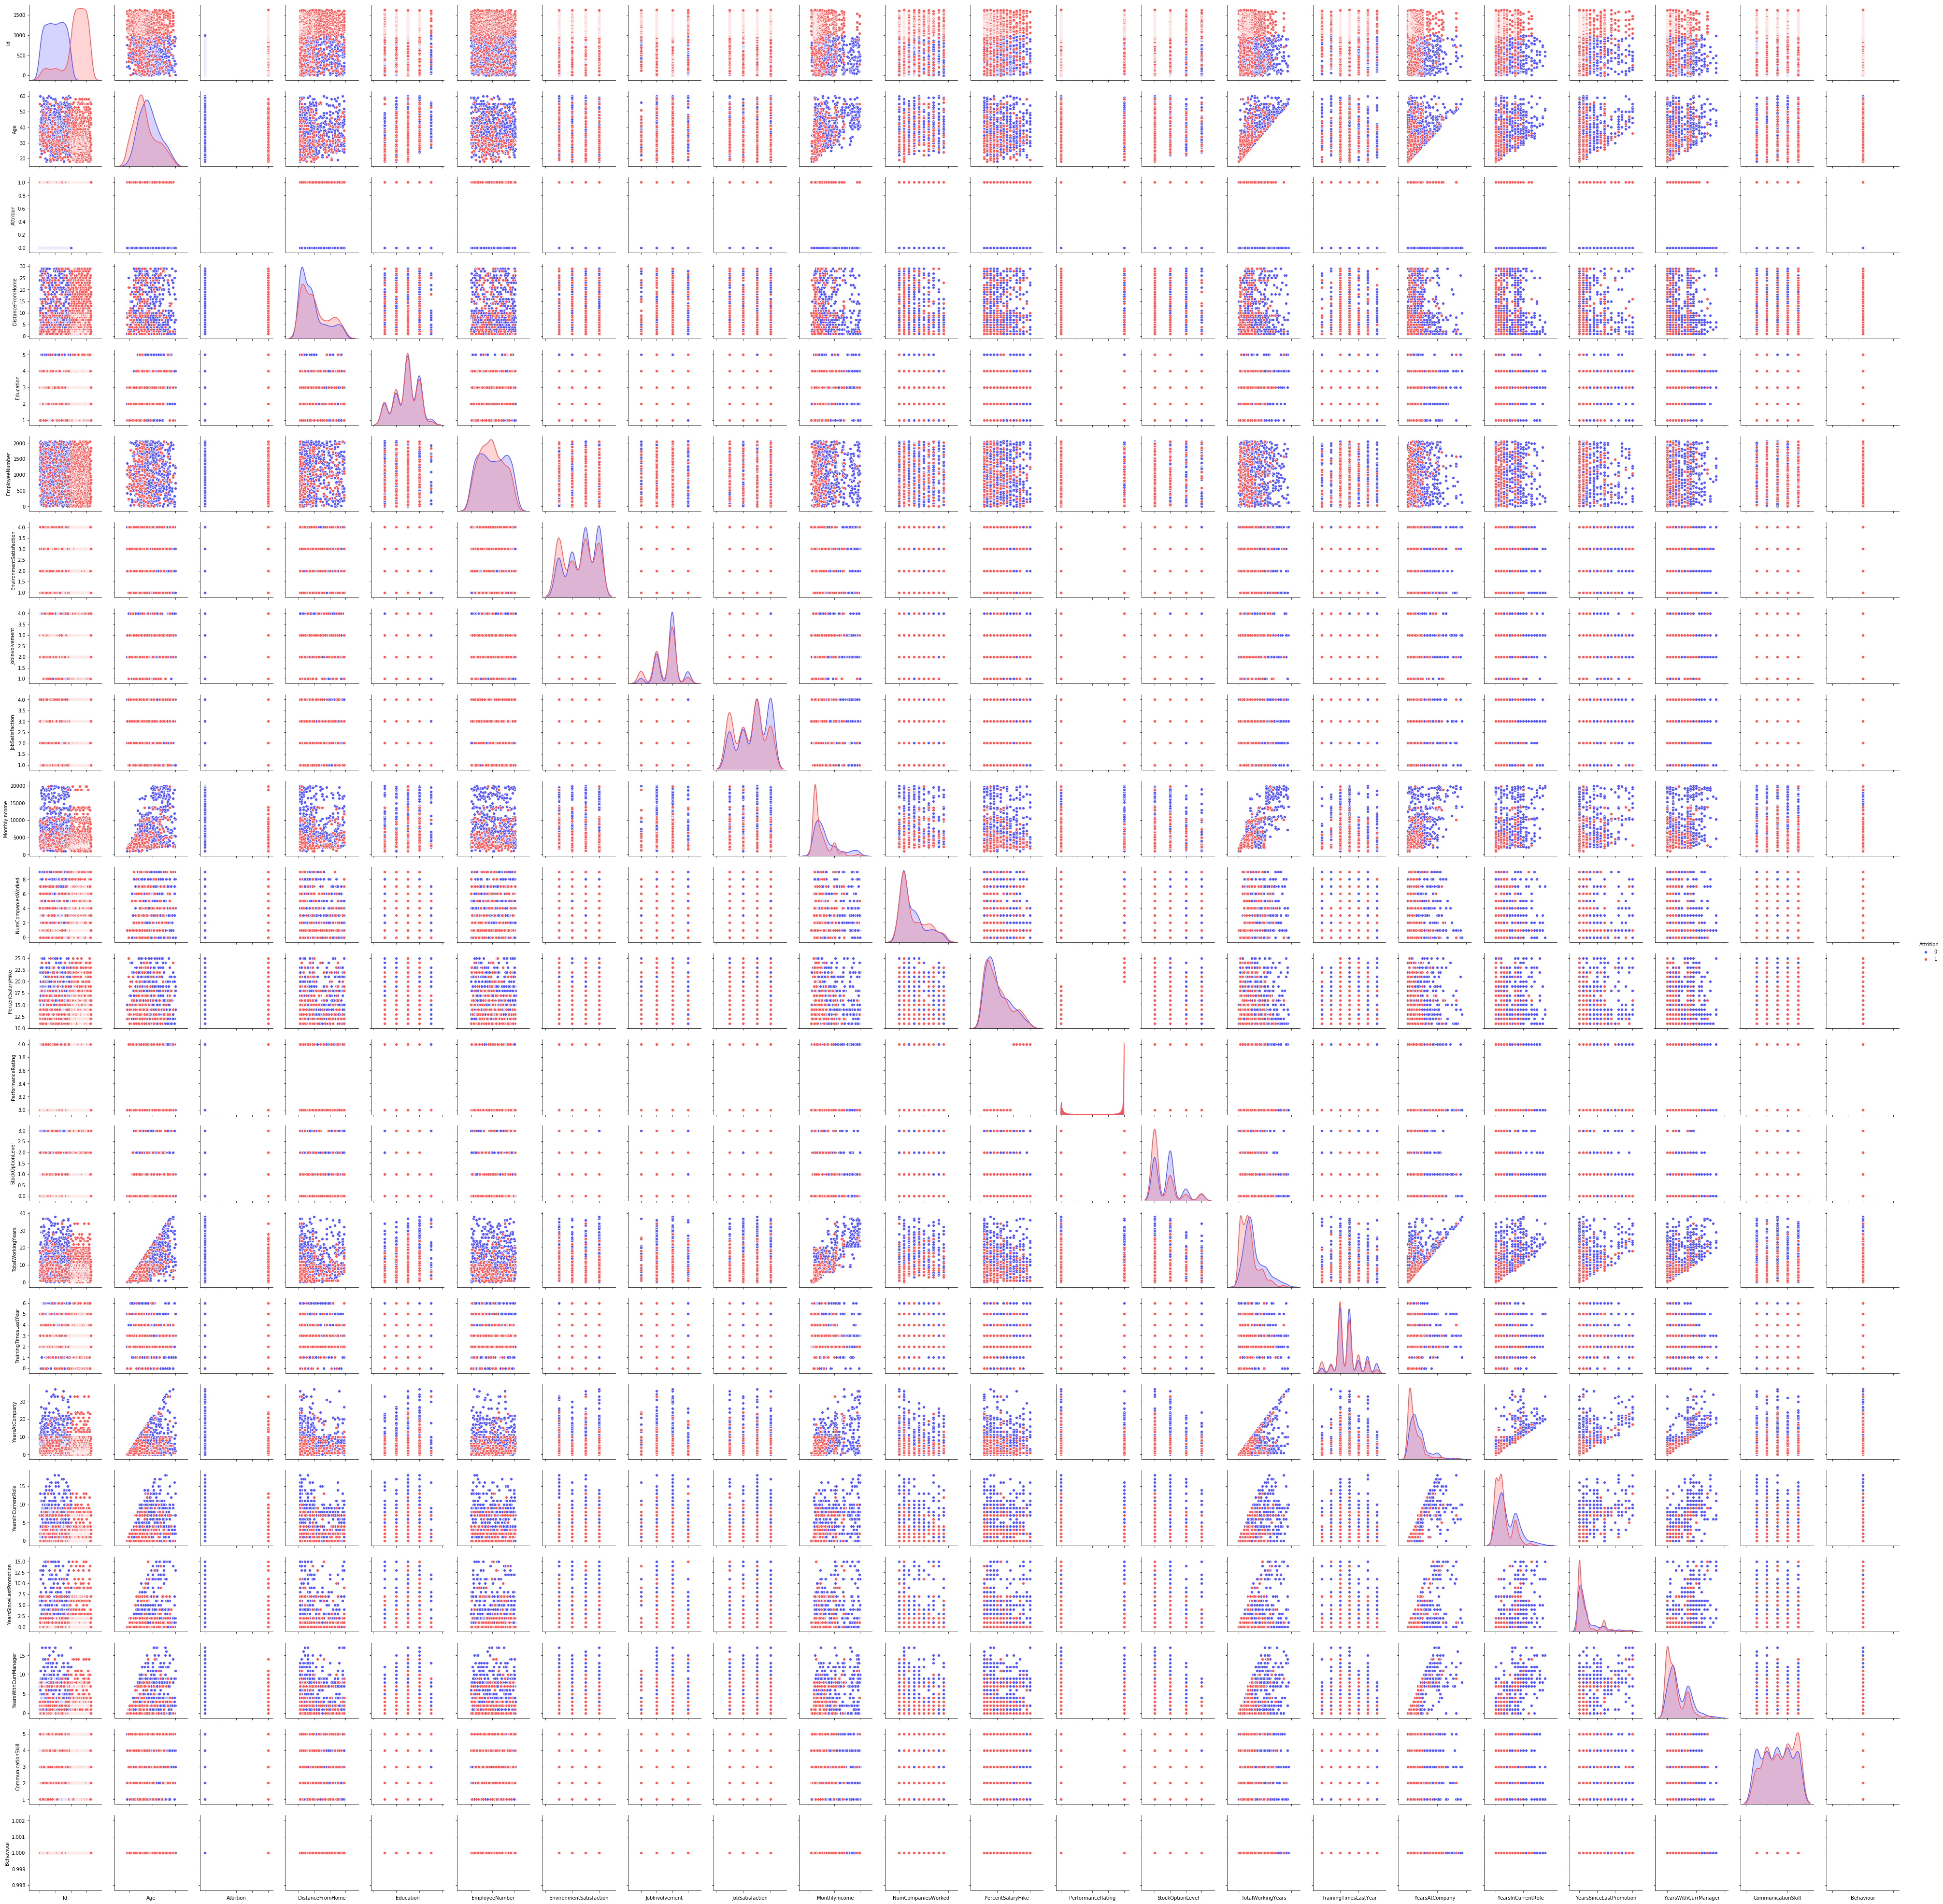

In [79]:
g = sns.pairplot(Data_int, hue='Attrition', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

C:\Users\Nimisha Jain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


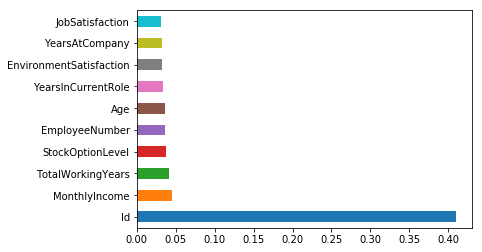

In [80]:
X = Data_int.drop('Attrition',axis=1)  #independent columns
y = Data_int['Attrition']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [81]:
#From HeatMap and Feature Importance
num_col = ['Id','TotalWorkingYears','MonthlyIncome','StockOptionLevel','Age','EnvironmentSatisfaction','YearsInCurrentRole','YearsWithCurrManager','JobSatisfaction','YearsAtCompany']

In [82]:
Data_int = Data[num_col]

In [83]:
Data_int.shape

(1628, 10)

In [84]:
Data_alpha.shape

(1628, 7)

In [85]:
for col in Data_alpha.columns:
    print (str(col) + str(Data_alpha[col].unique()))
    print(Data_alpha[col].value_counts())
    print("--------------------------------------------------------------------")

BusinessTravel['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64
--------------------------------------------------------------------
Department['Research & Development' 'Sales' 'Human Resources']
Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64
--------------------------------------------------------------------
EducationField['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64
--------------------------------------------------------------------
Gender['Female' 'Male']
Male      996
Female    632
Name: Gender, dtype: int64
--------------------------------------------------------------------
JobR

In [86]:
dummies = Data_alpha[["JobRole","Department"]]
Data_alpha = Data_alpha.drop("JobRole",axis=1)
Data_alpha = Data_alpha.drop("Department",axis=1)
Data_alpha.shape

(1628, 5)

In [87]:
dummies = pd.get_dummies(dummies)

In [88]:
dummies.shape

(1628, 12)

In [89]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
for i in Data_alpha.columns:
    Data_alpha[i] = LabelEncoder.fit_transform(Data_alpha[i])
Data_alpha.shape

(1628, 5)

In [90]:
Data_alpha = pd.concat([Data_alpha,dummies],axis=1)
Data_alpha.shape

(1628, 17)

In [131]:
Data = pd.concat([Data_alpha,Data_int],axis=1)
Data.shape

(1628, 27)

In [138]:
X = Data

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [140]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

In [141]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [142]:
forest.score(X_train, y_train)

0.9934479934479934

In [143]:
X_train.shape

(1221, 27)

In [144]:
pred = forest.predict_proba(X_test)

In [145]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(y_test, pred[:,1])
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.9743673331401527


In [146]:
forest.score(X_test,y_test)

0.9287469287469288

In [147]:
Datat= pd.read_csv("C:\\Users\\Nimisha Jain\\Downloads\\test.csv")

In [148]:
t_a=[]
for obj in Datat:
    if Datat[obj].dtype == 'O':
        t_a.append(obj)

In [149]:
Datat_alpha = Datat[t_a]

In [150]:
dummiest = Datat_alpha[["JobRole","Department"]]
Datat_alpha = Datat_alpha.drop("JobRole",axis=1)
Datat_alpha = Datat_alpha.drop("Department",axis=1)
Datat_alpha.shape

(470, 5)

In [151]:
dummiest = pd.get_dummies(dummiest)
dummiest.shape

(470, 12)

In [152]:
for i in Datat_alpha.columns:
    Datat_alpha[i] = LabelEncoder.fit_transform(Datat_alpha[i])
Datat_alpha.shape

(470, 5)

In [153]:
Datat_alpha = pd.concat([Datat_alpha,dummiest],axis=1)
Datat_alpha.shape

(470, 17)

In [154]:
Datat_int.head()

,Id,TotalWorkingYears,MonthlyIncome,StockOptionLevel,Age,EnvironmentSatisfaction,YearsInCurrentRole,YearsWithCurrManager,JobSatisfaction,YearsAtCompany
0,1,5,2070,1,28,4,2,4,4,5
1,2,13,5460,2,31,1,7,7,4,7
2,3,13,5974,2,37,3,7,7,1,7
3,4,8,6062,1,42,4,3,2,4,4
4,5,9,4447,0,45,3,7,8,2,9


In [155]:
Datat_int = Datat[num_col]
Datat = pd.concat([Datat_alpha,Datat_int],axis=1)
Datat.shape

(470, 27)

In [160]:
final_status = forest.predict_proba(Datat)
new=final_status[:,1]

array([0.2, 0.1, 0.1, 0.2, 0.3, 0.1, 0.6, 0.3, 0.1, 0.1, 0.3, 0.3, 0.2,
       0. , 0. , 0.1, 0.4, 0.3, 0.1, 0. , 0.2, 0.5, 0.1, 0.3, 0.2, 0.1,
       0.1, 0. , 0.8, 0. , 0.1, 0.2, 0.4, 0.2, 0. , 0. , 0. , 0.1, 0.2,
       0. , 0.3, 0.1, 0. , 0.1, 0. , 0. , 0.3, 0. , 0. , 0.3, 0.2, 0.1,
       0. , 0.5, 0.1, 0.2, 0. , 0.3, 0.1, 0.1, 0.1, 0.1, 0.3, 0. , 0.1,
       0.1, 0.1, 0. , 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.3, 0.2, 0.2, 0.1,
       0. , 0.3, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.3, 0.1, 0. , 0.6, 0. ,
       0.2, 0.4, 0.2, 0.3, 0.3, 0.4, 0.2, 0.4, 0. , 0.1, 0.1, 0.2, 0.1,
       0.3, 0.2, 0.1, 0.1, 0.1, 0. , 0. , 0.2, 0.3, 0. , 0.1, 0. , 0.1,
       0.1, 0. , 0. , 0.3, 0.3, 0.3, 0.2, 0.3, 0. , 0.2, 0. , 0.5, 0.1,
       0. , 0. , 0. , 0.3, 0. , 0. , 0.8, 0.1, 0.3, 0. , 0.3, 0.1, 0.4,
       0. , 0.2, 0.4, 0.1, 0.2, 0.3, 0.1, 0.5, 0.2, 0.2, 0.9, 0.1, 0.1,
       0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0. , 0.1, 0.1, 0.2, 0.3, 0.1, 0. ,
       0. , 0.2, 0. , 0.1, 0.2, 0. , 0.4, 0.4, 0.2, 0.2, 0.5, 0.

In [157]:
Data_final= pd.DataFrame(Datat,columns=['Id'])

In [158]:
Data_final = pd.concat([Data_final,pd.DataFrame(new,columns=['Attrition'])],axis=1)

In [159]:
Data_final.to_csv('C:/Users/Nimisha Jain/Downloads/Data_final.csv', index=False)

NameError: name 'pd' is not defined